*Experiment-9*

**Aim: Implementation of Q-Learning algorithm to solve the specific control Task** 

**Theory:**
Q-learning is a machine learning approach that enables a model to iteratively learn and improve over time by taking the correct action. Q-learning is a type of reinforcement learning.

With reinforcement learning, a machine learning model is trained to mimic the way animals or children learn. Good actions are rewarded or reinforced, while bad actions are discouraged and penalized.

With the state-action-reward-state-action form of reinforcement learning, the training regimen follows a model to take the right actions. Q-learning provides a model-free approach to reinforcement learning. There is no model of the environment to guide the reinforcement learning process. The agent -- which is the AI component that acts in the environment -- iteratively learns and makes predictions about the environment on its own.

Q-learning also takes an off-policy approach to reinforcement learning. A Q-learning approach aims to determine the optimal action based on its current state. The Q-learning approach can accomplish this by either developing its own set of rules or deviating from the prescribed policy. Because Q-learning may deviate from the given policy, a defined policy is not needed. Off-policy approach in Q-learning is achieved using Q-values -- also known as action values. The Q-values are the expected future values for action and are stored in the Q-table.

**Working:**

Q-learning models operate in an iterative process that involves multiple components working together to help train a model. The iterative process involves the agent learning by exploring the environment and updating the model as the exploration continues. The multiple components of Q-learning include the following:

1. Agents. The agent is the entity that acts and operates within an environment.
2. States. The state is a variable that identifies the current position in an environment of an agent.
3. Actions. The action is the agent's operation when it is in a specific state.
4. Rewards. A foundational concept within reinforcement learning is the concept of providing either a positive or a negative response for the agent's actions.
5. Episodes. An episode is when an agent can no longer take a new action and ends up terminating.
6. Q-values. The Q-value is the metric used to measure an action at a particular state.

Here are the two methods to determine the Q-value:

1. Temporal difference. The temporal difference formula calculates the Q-value by incorporating the value of the current state and action by comparing the differences with the previous state and action.
2. Bellman's equation. Mathematician Richard Bellman invented this equation in 1957 as a recursive formula for optimal decision-making. In the q-learning context, Bellman's equation is used to help calculate the value of a given state and assess its relative position. The state with the highest value is considered the optimal state.

Q-learning models work through trial-and-error experiences to learn the optimal behavior for a task. The Q-learning process involves modeling optimal behavior by learning an optimal action value function or q-function. This function represents the optimal long-term value of action a in state s and subsequently follows optimal behavior in every subsequent state.

![](QB_Q.png?raw=true)


**Q-Table**

The Q-table includes columns and rows with lists of rewards for the best actions of each state in a specific environment. A Q-table helps an agent understand what actions are likely to lead to positive outcomes in different situations.

The table rows represent different situations the agent might encounter, and the columns represent the actions it can take. As the agent interacts with the environment and receives feedback in the form of rewards or penalties, the values in the Q-table are updated to reflect what the model has learned.

The purpose of reinforcement learning is to gradually improve performance through the Q-table to help choose actions. With more feedback, the Q-table becomes more accurate so the agent can make better decisions and achieve optimal results.

The Q-table is directly related to the concept of the Q-function. The Q-function is a mathematical equation that looks at the current state of the environment and the action under consideration as inputs. The Q-function then generates outputs along with expected future rewards for that action in the specific state. The Q-table allows the agent to look up the expected future reward for any given state-action pair to move toward an optimized state.

**Q learning algorithm**

The Q-learning algorithm process is an interactive method where the agent learns by exploring the environment and updating the Q-table based on the rewards received.

The steps involved in the Q-learning algorithm process include the following:

1. Q-table initialization. The first step is to create the Q-table as a place to track each action in each state and the associated progress.
2. Observation. The agent needs to observe the current state of the environment.
3. Action. The agent chooses to act in the environment. Upon completion of the action, the model observes if the action is beneficial in the environment.
4. Update. After the action has been taken, it's time to update the Q-table with the results.
5. Repeat. Repeat steps 2-4 until the model reaches a termination state for a desired objective.

**Advantages:**

1. Model-free. The model-free approach is the foundation of Q-learning and one of the biggest potential advantages for some uses. Rather than requiring prior knowledge about an environment, the Q-learning agent can learn about the environment as it trains. The model-free approach is particularly beneficial for scenarios where the underlying dynamics of an environment are difficult to model or completely unknown.
2. Off-policy optimization. The model can optimize to get the best possible result without being strictly tethered to a policy that might not enable the same degree of optimization.
3. Flexibility. The model-free, off-policy approach enables Q-learning flexibility to work across a variety of problems and environments.
4. Offline training. A Q-learning model can be deployed on pre-collected, offline data sets.

**Disadvantages:**
1. Exploration vs. exploitation tradeoff. It can be hard for a Q-learning model to find the right balance between trying new actions and sticking with what's already known. It's a dilemma that is commonly referred to as the exploration vs. exploitation tradeoff for reinforcement learning.
2. Curse of dimensionality. Q-learning can potentially face a machine learning risk known as the curse of dimensionality. The curse of dimensionality is a problem with high-dimensional data where the amount of data required to represent the distribution increases exponentially. This can lead to computational challenges and decreased accuracy.
3. Overestimation. A Q-learning model can sometimes be too optimistic and overestimate how good a particular action or strategy is.
4. Performance. A Q-learning model can take a long time to figure out the best method if there are several ways to approach a problem.

**Example:**
1. Energy management
2. Finance
3. Robotics
4. Supply chain management

In [7]:
from typing import Tuple, Dict, Optional, Iterable, Callable

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML

import gym
from gym import spaces
from gym.error import DependencyNotInstalled

import pygame
from pygame import gfxdraw


class Maze(gym.Env):

    def __init__(self, exploring_starts: bool = False,
                 shaped_rewards: bool = False, size: int = 5) -> None:
        super().__init__()
        self.exploring_starts = exploring_starts
        self.shaped_rewards = shaped_rewards
        self.state = (size - 1, size - 1)
        self.goal = (size - 1, size - 1)
        self.maze = self._create_maze(size=size)
        self.distances = self._compute_distances(self.goal, self.maze)
        self.action_space = spaces.Discrete(n=4)
        self.action_space.action_meanings = {0: 'UP', 1: 'RIGHT', 2: 'DOWN', 3: "LEFT"}
        self.observation_space = spaces.MultiDiscrete([size, size])

        self.screen = None
        self.agent_transform = None

    def step(self, action: int) -> Tuple[Tuple[int, int], float, bool, Dict]:
        reward = self.compute_reward(self.state, action)
        self.state = self._get_next_state(self.state, action)
        done = self.state == self.goal
        info = {}
        return self.state, reward, done, info

    def reset(self) -> Tuple[int, int]:
        if self.exploring_starts:
            while self.state == self.goal:
                self.state = tuple(self.observation_space.sample())
        else:
            self.state = (0, 0)
        return self.state

    def render(self, mode: str = 'human') -> Optional[np.ndarray]:
        assert mode in ['human', 'rgb_array']

        screen_size = 600
        scale = screen_size / 5

        if self.screen is None:
            pygame.init()
            self.screen = pygame.Surface((screen_size, screen_size))

        surf = pygame.Surface((screen_size, screen_size))
        surf.fill((22, 36, 71))


        for row in range(5):
            for col in range(5):

                state = (row, col)
                for next_state in [(row + 1, col), (row - 1, col), (row, col + 1), (row, col - 1)]:
                    if next_state not in self.maze[state]:

                        # Add the geometry of the edges and walls (i.e. the boundaries between
                        # adjacent squares that are not connected).
                        row_diff, col_diff = np.subtract(next_state, state)
                        left = (col + (col_diff > 0)) * scale - 2 * (col_diff != 0)
                        right = ((col + 1) - (col_diff < 0)) * scale + 2 * (col_diff != 0)
                        top = (5 - (row + (row_diff > 0))) * scale - 2 * (row_diff != 0)
                        bottom = (5 - ((row + 1) - (row_diff < 0))) * scale + 2 * (row_diff != 0)

                        gfxdraw.filled_polygon(surf, [(left, bottom), (left, top), (right, top), (right, bottom)], (255, 255, 255))

        # Add the geometry of the goal square to the viewer.
        left, right, top, bottom = scale * 4 + 10, scale * 5 - 10, scale - 10, 10
        gfxdraw.filled_polygon(surf, [(left, bottom), (left, top), (right, top), (right, bottom)], (40, 199, 172))

        # Add the geometry of the agent to the viewer.
        agent_row = int(screen_size - scale * (self.state[0] + .5))
        agent_col = int(scale * (self.state[1] + .5))
        gfxdraw.filled_circle(surf, agent_col, agent_row, int(scale * .6 / 2), (228, 63, 90))

        surf = pygame.transform.flip(surf, False, True)
        self.screen.blit(surf, (0, 0))

        return np.transpose(
            np.array(pygame.surfarray.pixels3d(self.screen)), axes=(1, 0, 2)
        )

    def close(self) -> None:
        if self.screen is not None:
            pygame.display.quit()
            pygame.quit()
            self.screen = None

    def compute_reward(self, state: Tuple[int, int], action: int) -> float:
        next_state = self._get_next_state(state, action)
        if self.shaped_rewards:
            return - (self.distances[next_state] / self.distances.max())
        return - float(state != self.goal)

    def simulate_step(self, state: Tuple[int, int], action: int):
        reward = self.compute_reward(state, action)
        next_state = self._get_next_state(state, action)
        done = next_state == self.goal
        info = {}
        return next_state, reward, done, info

    def _get_next_state(self, state: Tuple[int, int], action: int) -> Tuple[int, int]:
        if action == 0:
            next_state = (state[0] - 1, state[1])
        elif action == 1:
            next_state = (state[0], state[1] + 1)
        elif action == 2:
            next_state = (state[0] + 1, state[1])
        elif action == 3:
            next_state = (state[0], state[1] - 1)
        else:
            raise ValueError("Action value not supported:", action)
        if next_state in self.maze[state]:
            return next_state
        return state

    @staticmethod
    def _create_maze(size: int) -> Dict[Tuple[int, int], Iterable[Tuple[int, int]]]:
        maze = {(row, col): [(row - 1, col), (row + 1, col), (row, col - 1), (row, col + 1)]
                for row in range(size) for col in range(size)}

        left_edges = [[(row, 0), (row, -1)] for row in range(size)]
        right_edges = [[(row, size - 1), (row, size)] for row in range(size)]
        upper_edges = [[(0, col), (-1, col)] for col in range(size)]
        lower_edges = [[(size - 1, col), (size, col)] for col in range(size)]
        walls = [
            [(1, 0), (1, 1)], [(2, 0), (2, 1)], [(3, 0), (3, 1)],
            [(1, 1), (1, 2)], [(2, 1), (2, 2)], [(3, 1), (3, 2)],
            [(3, 1), (4, 1)], [(0, 2), (1, 2)], [(1, 2), (1, 3)],
            [(2, 2), (3, 2)], [(2, 3), (3, 3)], [(2, 4), (3, 4)],
            [(4, 2), (4, 3)], [(1, 3), (1, 4)], [(2, 3), (2, 4)],
        ]

        obstacles = upper_edges + lower_edges + left_edges + right_edges + walls

        for src, dst in obstacles:
            maze[src].remove(dst)

            if dst in maze:
                maze[dst].remove(src)

        return maze

    @staticmethod
    def _compute_distances(goal: Tuple[int, int],
                           maze: Dict[Tuple[int, int], Iterable[Tuple[int, int]]]) -> np.ndarray:
        distances = np.full((5, 5), np.inf)
        visited = set()
        distances[goal] = 0.

        while visited != set(maze):
            sorted_dst = [(v // 5, v % 5) for v in distances.argsort(axis=None)]
            closest = next(x for x in sorted_dst if x not in visited)
            visited.add(closest)

            for neighbour in maze[closest]:
                distances[neighbour] = min(distances[neighbour], distances[closest] + 1)
        return distances


def plot_policy(probs_or_qvals, frame, action_meanings=None):
    if action_meanings is None:
        action_meanings = {0: 'U', 1: 'R', 2: 'D', 3: 'L'}
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    max_prob_actions = probs_or_qvals.argmax(axis=-1)
    probs_copy = max_prob_actions.copy().astype(object)
    for key in action_meanings:
        probs_copy[probs_copy == key] = action_meanings[key]
    sns.heatmap(max_prob_actions, annot=probs_copy, fmt='', cbar=False, cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 12}, linewidths=2, ax=axes[0])
    axes[1].imshow(frame)
    axes[0].axis('off')
    axes[1].axis('off')
    plt.suptitle("Policy", size=18)
    plt.tight_layout()


def plot_values(state_values, frame):
    f, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.heatmap(state_values, annot=True, fmt=".2f", cmap='coolwarm',
                annot_kws={'weight': 'bold', 'size': 12}, linewidths=2, ax=axes[0])
    axes[1].imshow(frame)
    axes[0].axis('off')
    axes[1].axis('off')
    plt.tight_layout()


def display_video(frames):
    # Copied from: https://colab.research.google.com/github/deepmind/dm_control/blob/master/tutorial.ipynb
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matplotlib.use(orig_backend)
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
        im.set_data(frame)
        return [im]
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=50, blit=True, repeat=False)
    return HTML(anim.to_html5_video())


def test_agent(environment, policy, episodes=10):
    frames = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        frames.append(env.render(mode="rgb_array"))

        while not done:
            p = policy(state)
            if isinstance(p, np.ndarray):
                action = np.random.choice(4, p=p)
            else:
                action = p
            next_state, reward, done, extra_info = env.step(action)
            img = env.render(mode="rgb_array")
            frames.append(img)
            state = next_state

    return display_video(frames)


def plot_action_values(action_values):

    text_positions = [
        [(0.35, 4.75), (1.35, 4.75), (2.35, 4.75), (3.35, 4.75), (4.35, 4.75),
         (0.35, 3.75), (1.35, 3.75), (2.35, 3.75), (3.35, 3.75), (4.35, 3.75),
         (0.35, 2.75), (1.35, 2.75), (2.35, 2.75), (3.35, 2.75), (4.35, 2.75),
         (0.35, 1.75), (1.35, 1.75), (2.35, 1.75), (3.35, 1.75), (4.35, 1.75),
         (0.35, 0.75), (1.35, 0.75), (2.35, 0.75), (3.35, 0.75), (4.35, 0.75)],
        [(0.6, 4.45), (1.6, 4.45), (2.6, 4.45), (3.6, 4.45), (4.6, 4.45),
         (0.6, 3.45), (1.6, 3.45), (2.6, 3.45), (3.6, 3.45), (4.6, 3.45),
         (0.6, 2.45), (1.6, 2.45), (2.6, 2.45), (3.6, 2.45), (4.6, 2.45),
         (0.6, 1.45), (1.6, 1.45), (2.6, 1.45), (3.6, 1.45), (4.6, 1.45),
         (0.6, 0.45), (1.6, 0.45), (2.6, 0.45), (3.6, 0.45), (4.6, 0.45)],
        [(0.35, 4.15), (1.35, 4.15), (2.35, 4.15), (3.35, 4.15), (4.35, 4.15),
         (0.35, 3.15), (1.35, 3.15), (2.35, 3.15), (3.35, 3.15), (4.35, 3.15),
         (0.35, 2.15), (1.35, 2.15), (2.35, 2.15), (3.35, 2.15), (4.35, 2.15),
         (0.35, 1.15), (1.35, 1.15), (2.35, 1.15), (3.35, 1.15), (4.35, 1.15),
         (0.35, 0.15), (1.35, 0.15), (2.35, 0.15), (3.35, 0.15), (4.35, 0.15)],
        [(0.05, 4.45), (1.05, 4.45), (2.05, 4.45), (3.05, 4.45), (4.05, 4.45),
         (0.05, 3.45), (1.05, 3.45), (2.05, 3.45), (3.05, 3.45), (4.05, 3.45),
         (0.05, 2.45), (1.05, 2.45), (2.05, 2.45), (3.05, 2.45), (4.05, 2.45),
         (0.05, 1.45), (1.05, 1.45), (2.05, 1.45), (3.05, 1.45), (4.05, 1.45),
         (0.05, 0.45), (1.05, 0.45), (2.05, 0.45), (3.05, 0.45), (4.05, 0.45)]]

    fig, ax = plt.subplots(figsize=(7, 7))
    tripcolor = quatromatrix(action_values, ax=ax,
                             triplotkw={"color": "k", "lw": 1}, tripcolorkw={"cmap": "coolwarm"})
    ax.margins(0)
    ax.set_aspect("equal")
    fig.colorbar(tripcolor)

    for j, av in enumerate(text_positions):
        for i, (xi, yi) in enumerate(av):
            plt.text(xi, yi, round(action_values[:, :, j].flatten()[i], 2), size=8, color="w", weight="bold")

    plt.title("Action values Q(s,a)", size=18)
    plt.tight_layout()
    plt.show()


def quatromatrix(action_values, ax=None, triplotkw=None, tripcolorkw=None):
    action_values = np.flipud(action_values)
    n = 5
    m = 5
    a = np.array([[0, 0], [0, 1], [.5, .5], [1, 0], [1, 1]])
    tr = np.array([[0, 1, 2], [0, 2, 3], [2, 3, 4], [1, 2, 4]])
    A = np.zeros((n * m * 5, 2))
    Tr = np.zeros((n * m * 4, 3))
    for i in range(n):
        for j in range(m):
            k = i * m + j
            A[k * 5:(k + 1) * 5, :] = np.c_[a[:, 0] + j, a[:, 1] + i]
            Tr[k * 4:(k + 1) * 4, :] = tr + k * 5
    C = np.c_[action_values[:, :, 3].flatten(), action_values[:, :, 2].flatten(),
    action_values[:, :, 1].flatten(), action_values[:, :, 0].flatten()].flatten()

    ax.triplot(A[:, 0], A[:, 1], Tr, **triplotkw)
    tripcolor = ax.tripcolor(A[:, 0], A[:, 1], Tr, facecolors=C, **tripcolorkw)
    return tripcolor




In [8]:
env = Maze()

In [9]:
action_values = np.zeros((5, 5, 4))

In [10]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [11]:
def exploratory_policy(state):
    return np.random.randint(4)

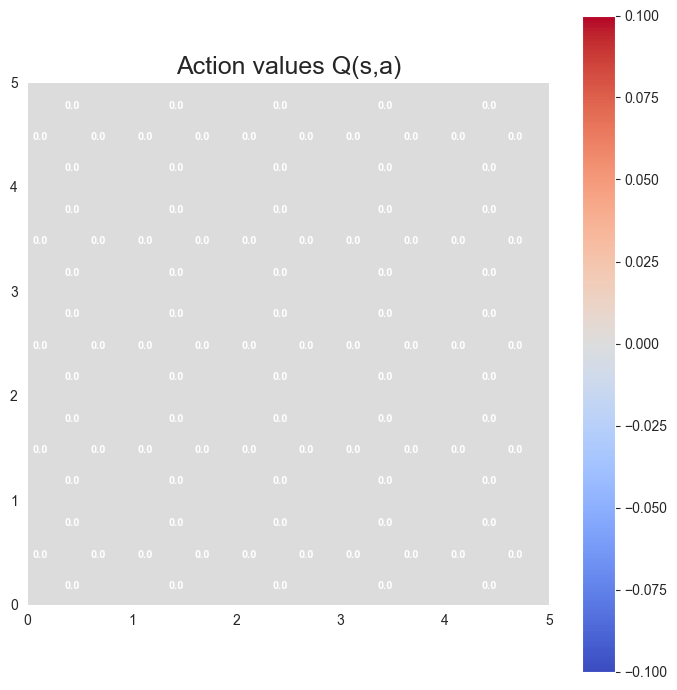

In [12]:
plot_action_values(action_values)

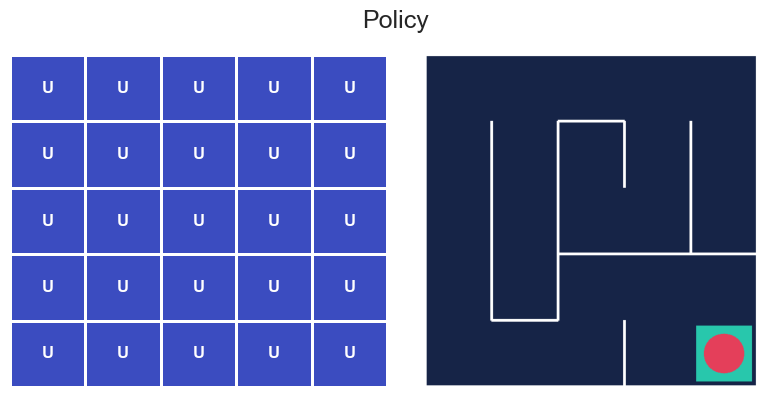

In [13]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [14]:
def q_learning(action_values, exploratory_policy, target_policy,
               episodes, alpha=0.1, gamma=0.99):
    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False

        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            next_action = target_policy(next_state)

            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)

            state = next_state

In [15]:
q_learning(action_values, exploratory_policy, target_policy, 5000)

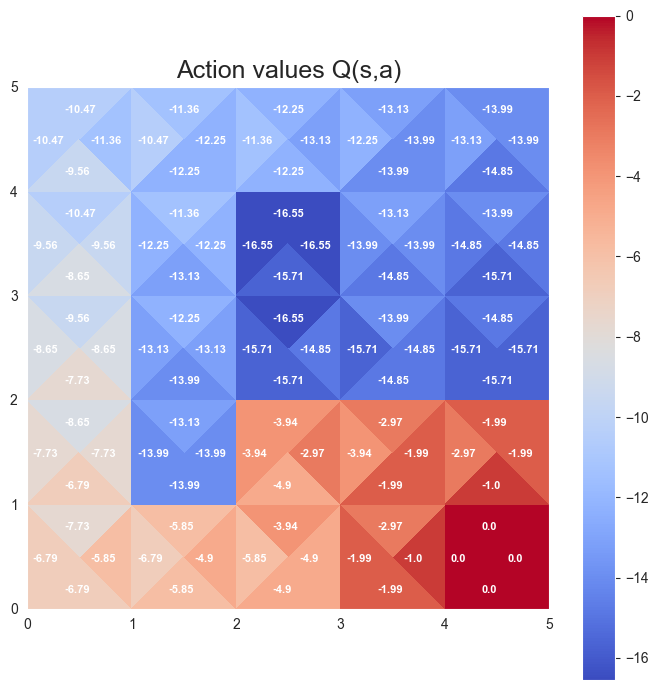

In [18]:
plot_action_values(action_values)

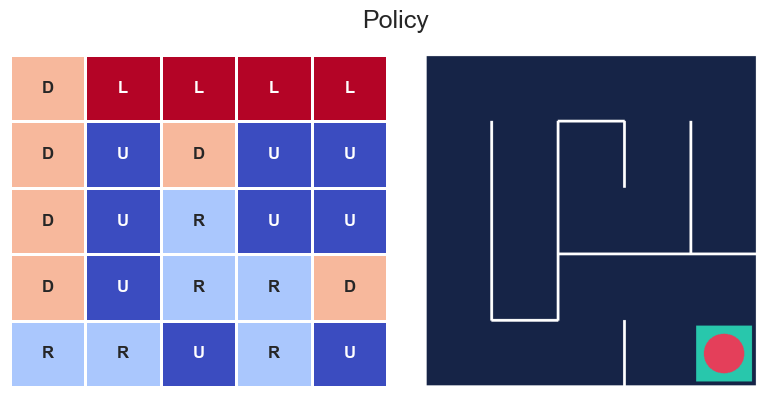

In [16]:
plot_policy(action_values, env.render(mode='rgb_array'))

In [17]:
test_agent(env, target_policy)

**Conclusion:**

In this experiment we learnt about the q learning algorithm which is a very popular off policy algorithm in the reinforcement learning, we got a thorough knowledge about its working, advantages, disadvantages.
Q-learning stands out as a potent algorithm in reinforcement learning, offering the ability to derive optimal strategies through exploration and exploitation.